<a href="https://colab.research.google.com/github/Projas-14/ADA-informes/blob/main/algoritmo_de_Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema del camino más corto

¿Que es el problema del camino mas corto?

- se trata de encontrar una ruta/camino que conecte a 2 nodos de modo que la distancia entre ambos sea la minima posible.

*Entrada:* Un grafo dirigido $G=(V,E)$ donde V es un vertice fuente y E es el valor asociado a cada arco.

*Salida:* 
- Caso 1:
La distancia mas corta $dist(s,v)$ para cada vertice V.
- Caso 2: Declarando que G contiene un ciclo negativo.

Grafo G:

Cada arco o conexión del grafo tiene asociado un distancia o costo, por lo tanto, la distancia entre un vértice y otro se calculará como la suma de los arcos que hay entre ellos.

Ejemplo de grafo dirigido:

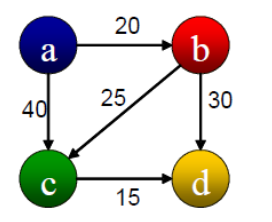


# Algoritmo de Bellman-Ford

*Generador de instancias*

In [4]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [44]:
import networkx as nx


def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

Algoritmo de Bellman-ford

In [61]:
from sys import maxsize

def BellmanFord(graph, V, E, s, verbose = False):
 
    # Inicializamos la distancia a cada nodo en infinito
    dist = [maxsize] * V
 
    # Inicializamos el nodo de partida con distancia cero
    dist[s] = 0

    if verbose:
      print(f"lista de tamaño {V}\n")
 
     # Se recorren los arcos del grafo V - 1 veces
    for i in range(V - 1):
        for j in range(E):
            if dist[graph[j][0]] + graph[j][2] < dist[graph[j][1]]:
                if verbose:
                  print(f"Se revisa si {dist[graph[j][0]] + graph[j][2]} < {dist[graph[j][1]]}")
                  print("distancia Actualizada")
                dist[graph[j][1]] = dist[graph[j][0]] + graph[j][2]


     # Se vuelven a recorrer los arcos para revisar si existen ciclos negativos

    if verbose:
      print("\n ¿existe un ciclo negativo?")
    for i in range(E):
        x = graph[i][0]
        y = graph[i][1]
        weight = graph[i][2]
        if dist[x] != maxsize and dist[x] + weight < dist[y]:
            return 0
            print("El gráfico contiene un ciclo de peso negativo")
            return list() # Si existe un ciclo negativo retornamos una lista vacía

    if verbose:
      print("no existe ciclo negativo\n")

    print(f"distancia del vértice {s}")
    for i in range(V):
        print("%d\t\t%d" % (i, dist[i]))





Implementación visualize 


Grafo de inicio:  [(0, 4, 8), (0, 9, 30), (8, 6, 100), (8, 2, 1), (1, 7, 35), (6, 0, 21), (5, 3, 12), (4, 3, 83), (4, 2, 68), (4, 6, 69), (2, 7, -24), (3, 2, 13), (6, 1, 66), (0, 5, 89), (9, 8, 70)]
distancia del vértice 0
0		0
1		143
2		76
3		91
4		8
5		89
6		77
7		52
8		100
9		30


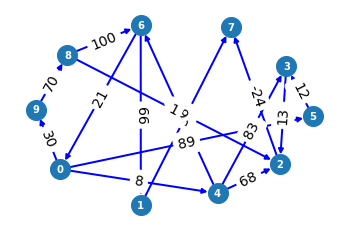

In [62]:
graph,a = instance_generator(10)
print("Grafo de inicio: ",graph)
BellmanFord(graph, 10, len(graph), a)
graph = graph_to_nxdigraph(graph,10)
pos=nx.spring_layout(graph,20)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels,font_size=14)
nx.draw(graph,pos, with_labels=True, node_size=400, font_color="white", font_size=10, font_weight="black", width  =2.0, edge_color ="blue")

**Verbose True**

Grafo de inicio:  [(0, 6, 71), (0, 4, 71), (8, 2, 80), (8, 1, 50), (6, 8, 75), (6, 9, 37), (6, 4, 39), (3, 7, 11), (4, 7, 23), (7, 8, 41), (5, 9, 97), (9, 7, 78), (9, 8, 53), (9, 0, 35), (1, 5, 51), (2, 9, 30), (2, 0, 10), (2, 4, 60), (8, 3, 30)]
lista de tamaño 10

Se revisa si 71 < 9223372036854775807
distancia Actualizada
Se revisa si 71 < 9223372036854775807
distancia Actualizada
Se revisa si 146 < 9223372036854775807
distancia Actualizada
Se revisa si 108 < 9223372036854775807
distancia Actualizada
Se revisa si 94 < 9223372036854775807
distancia Actualizada
Se revisa si 135 < 146
distancia Actualizada
Se revisa si 165 < 9223372036854775807
distancia Actualizada
Se revisa si 215 < 9223372036854775807
distancia Actualizada
Se revisa si 185 < 9223372036854775807
distancia Actualizada
Se revisa si 236 < 9223372036854775807
distancia Actualizada

 ¿existe un ciclo negativo?
no existe ciclo negativo

distancia del vértice 0
0		0
1		185
2		215
3		165
4		71
5		236
6		71
7		94
8		135
9		10

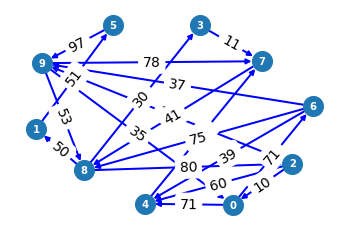

In [63]:
graph,a = instance_generator(10)
print("Grafo de inicio: ",graph)
BellmanFord(graph, 10, len(graph), a,True)
graph = graph_to_nxdigraph(graph,10)
pos=nx.spring_layout(graph,20)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels,font_size=14)
nx.draw(graph,pos, with_labels=True, node_size=400, font_color="white", font_size=10, font_weight="black", width  =2.0, edge_color ="blue")

## Descripción del algoritmo


Entrada: un grafo dirigido  con  vértices, donde cada arco posee un costo/distancia y un nodo  que corresponde al punto de partida. 

Salida: 
- Caso 1: *no existen ciclos negativos*, el algoritmo retorna una lista con la distancia mínima que existe entre el nodo inicial y el resto de nodos del grafo. 

- Caso 2: En caso contrario, el algoritmo retorna una lista vacía y indica que es un *Ciclo negativo detectado*.

Pasos:

1. se crea una lista para guardar la distancia mínima de  al resto de nodos y sus valores en infinito.
2. Caso base: Asignamos al nodo "S" una distancia de 0, puesto que corresponde al nodo inicial.
3. Se itera V-1(es decir los siguientes nodos) por todos los arcos del grafo o hasta que no existan más cambios en las distancias (lo que ocurra primero).
4. Para cada uno de los carcos, se calcula la distyancia entre S a V(nodo de llegada)
Como $dist(s,v) = dist(s,u)+w(u,v)$
donde w corresponde al costo del arco.
5. Si la distancia es menor a la anterior se usa la actual. "se actualiza su valor"
6.  Despues de finalizar las iteraciones, se realiza una ultima iteracion para verificar que no existan ciclos negativos.
"si existen se retorna la lista vacia"
7. Si no existen ciclos negativos se retorna la lista con las distancia minimas obtenidas.

Ejemplo:

se crea una lista para guardar la distancia mínima de al resto de nodos y sus valores en infinito.


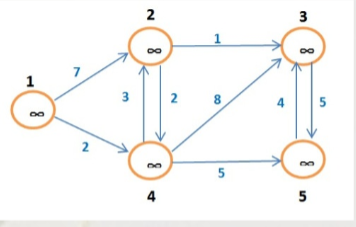

Caso base: Asignamos al nodo "S" una distancia de 0, puesto que corresponde al nodo inicial.

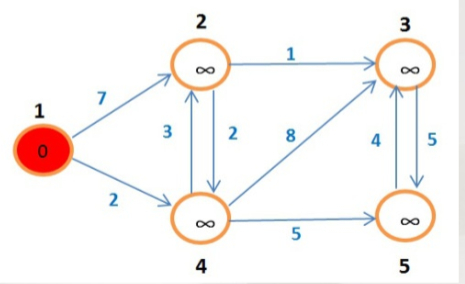

Primera iteración con las arista mas cercanas

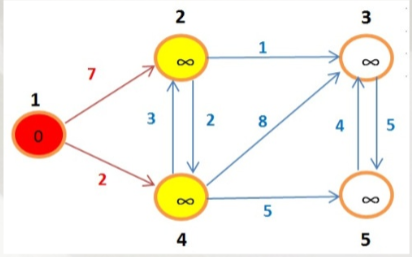

Se evalua primero para 2:
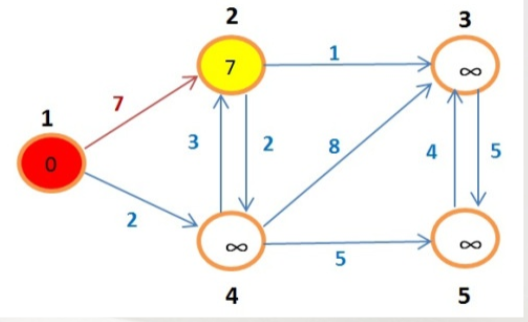


Ahora evaluamos al siguiente vertice 4:
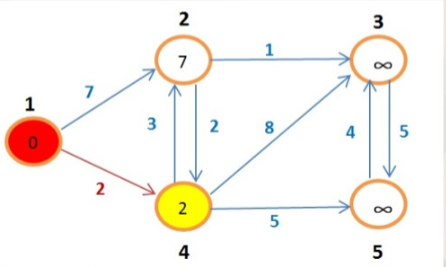

Se termina las primera aristas, ahora se continuan con las siguentes.

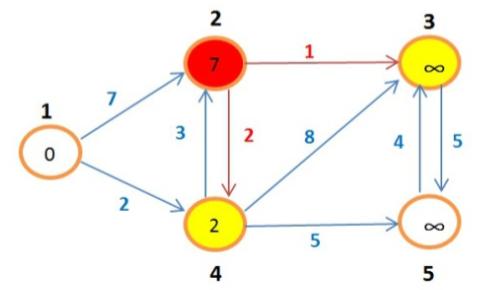

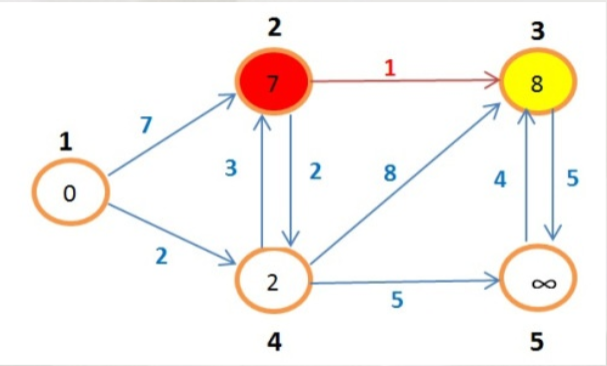

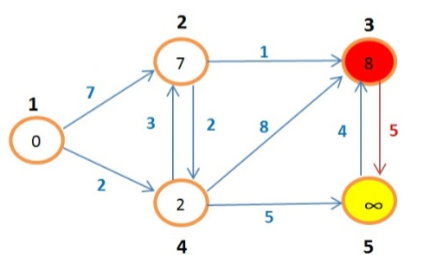

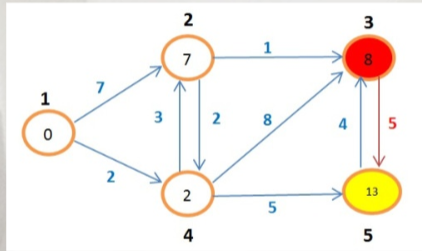

Ahora evaluar el siguiente vertice a evaluar es el 4 que posee tres aristas:
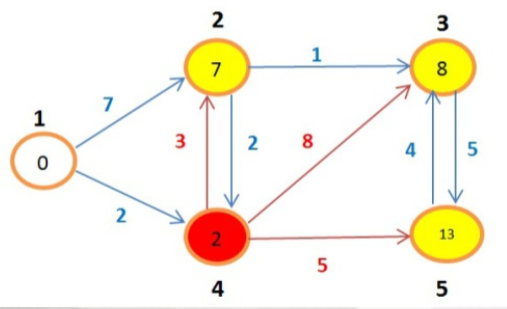

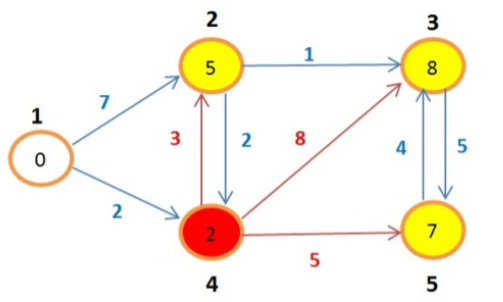

Ahora continuamos con el vertice 5:
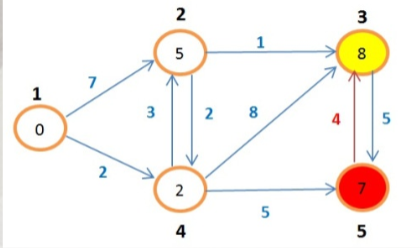

Segunda iteracion:
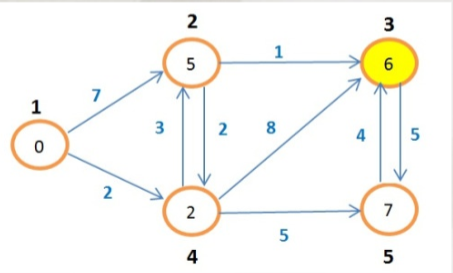

Y al final encontramos todas las rutas cortas posibles dandonos el siguiente grafo.

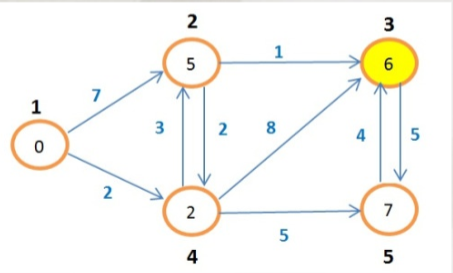

Y tendriamos que:

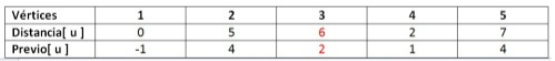

Se analiza los posibles ciclos negativos "no existen en este caso".

# Algoritmo de Dijkstra



Generador de instancias (sin ciclo negativo)


In [25]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_dijkstra(n: int):                                        #el unico cambio que tiene son los valores de los arcos para no tener negativos
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]


def graph_to_nxdigraph(grafo, V):
    edges = len(grafo)                                                          #se transforma el grafo a una matriz
    newGraph = [[0 for i in range(V)] for j in range(V)]

    for node in range(edges):
        for (x, y, peso) in grafo:
            newGraph[x][y] = peso

    return newGraph








Codigo Dijkastra

In [31]:
#se calcula la distancia minima entre un nodo a otro
def minDistance(V, dist, visitado,verbose=False):
  min = float("inf")
  min_index = 0
  for u in range(V):
    if dist[u] < min and visitado[u] == False:                               
      min = dist[u]
      min_index = u
  return min_index


def Dijkstra(grafo, V ,s,verbose=False):
  dist = [float("inf")] * V                                                     #se inicializa un arreglo tamaño v con las distancias
  dist[s] = 0                                                                   #la distancia de el nodo a el mismo es 0
  visitado = [False] * V
  for cout in range(V):                                                         #se calcula la distancia minima de un nodo a otro y luego se compara si es la menor
    x = minDistance(V, dist, visitado,verbose)
    visitado[x] = True

    for y in range(V):
      if grafo[x][y] > 0 and visitado[y] == False and dist[y] > dist[x] + grafo[x][y]:
        dist[y] = dist[x] + grafo[x][y]
  print(f"camino más corto desde el nodo {s} a los demás:")
  for node in range(V):
    print(node, "\t", dist[node])




In [32]:
graph,s = instance_generator_dijkstra(10)
graph = graph_to_nxdigraph(graph,10)
print("Grafo de inicio: ",graph)
Dijkstra(graph,10,s)

Grafo de inicio:  [[0, 0, 0, 44, 0, 0, 0, 0, 0, 17], [89, 0, 0, 60, 0, 0, 0, 24, 0, 0], [64, 0, 0, 0, 0, 91, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 57, 36, 0, 0], [0, 0, 79, 0, 0, 72, 0, 0, 0, 0], [0, 13, 0, 0, 0, 0, 0, 0, 0, 88], [0, 0, 0, 0, 0, 0, 0, 99, 0, 0], [0, 0, 0, 0, 0, 18, 0, 0, 64, 58], [74, 0, 0, 0, 58, 97, 0, 0, 0, 0], [0, 67, 0, 57, 0, 0, 0, 0, 0, 0]]
camino más corto desde el nodo 0 a los demás:
0 	 0
1 	 84
2 	 281
3 	 44
4 	 202
5 	 98
6 	 101
7 	 80
8 	 144
9 	 17


**Descripción del algoritmo**

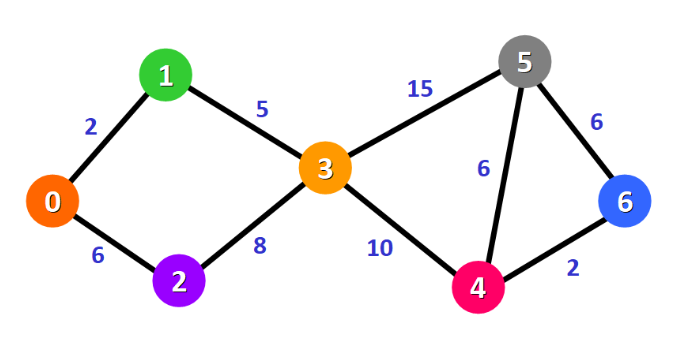

El algoritmo de Dijkstra:

* Se inicializa un arreglo de tamaño V los cuales se le asigna valores  de infinitos.
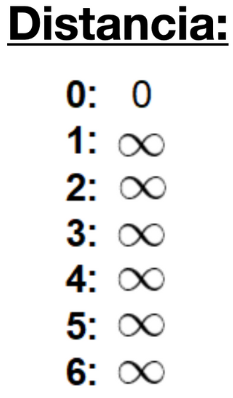

* Se elige un nodo que no esté en el conjunto y tenga valor de distancia mínimo, este valor es luego ingresado al conjunto.
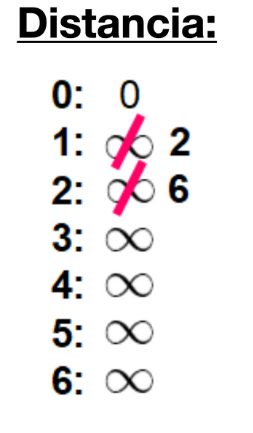

* Se iterar sobre los nodos *adyacentes* y se actualiza los valores de distancia de cada uno de estos.
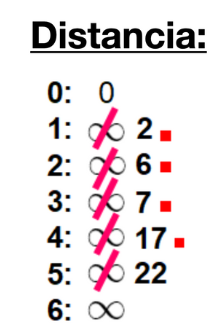

* Finalmente se retorna la lista con los valores minimos del nodo S a los nodos adyacentes .
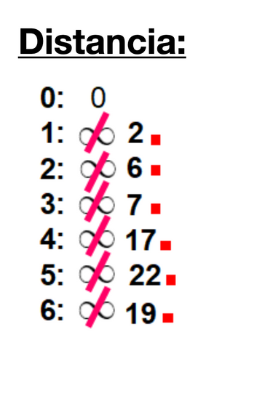


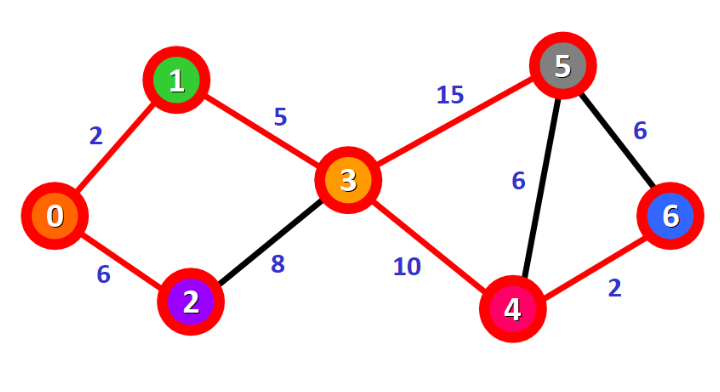

# Correctitud

**Teorema 1: Correctitud del algoritmo Bellman-Ford**

Este algoritmo calcla de forma correcta la distancia de un nodo incial *s* al resto de los nodos de un grafo *G* el cual no tenga cicls negativos.


## Prueba del teorema

Hipótesis inductiva

La distancia de s a cada nodo sepadaod como maximo por k arcos es la distancia mas corta.

#### Inducción

**Caso Base**

- Para k = 0, despues de la iteración 0 tenemos que $Dist[s,0] = 0 $ y la $Dist[v,0] = ∞$ para cualquier nodo $ v \in V - {s}$. 

**Paso inductivo**

Suponemos que la *Hipotesis  inductiva se mantiene* para cada i, por lo que probamos que se mantiene para $i+1$.
Sea $v$ un nodo de $V$, entonces existe una ruta mas corta entre $s y v$.
Por inducción, sabemos que la distancia calculada para cada nodo  es óptima. Luego, al sumar el peso del arco

entonces al seaber que obtendremos la distancia de $s->v$ pasado por el nodo u existiran dos posibles casos.

1. El camino $s->v$ sera el mas corto y este esya formando por el arco k.

2. el camino $s->v$ sera el mas corto y este arco estar formado por $s->u->v$ que sera la minima distancia de $s->v$, al finalizar la iteraciones.



# Tiempo de ejecución de  Bellman-Ford

Analisis de tiempo de ejecución para este algoritmo analizaremos las iteración que tiene se genera para encontrar los caminos mas cortos.

0. iteración 0 (inicialización):

Para ello usaremos como nodo raíz P, el cual se le asigna una distancia 0 a sí mismo e inicializamos las distancias a los demas nodos en infinito.

1. Iteración 1

Se Busca las distancias mas cortas a los nodos donde solo se recorre un solo arco.

2. Iteración 2

Se repite el mismo proceso, esta vez se itera actualizando las rutas mas cortas con maximo de dos arcos.

3. Se repite el mismo proceso hasta llegar a i-1 iteraciones, esta vez se itera actualizando las rutas mas cortas con maximo de k-1 arcos.

Entonces el tiempo  de ejecución del algoritmo *dependerá de la cantidad de nodos y arcos*.

Entonces cabe la posibilidad que el nodo tenga que pasar por todas las iteraciones y en otros casos el resultados se puede obtener en las primeras.

Para ello analizaremos los casos posibles

**Peor Caso**

Se puede generar con varias situaciones en donde el grafo puede tener un *ciclo negativo*

Entonces el caso mas común para el peor caso es cuando *los nodos tiene la mayor cantidad de conxeciones posibles en el grafo* para ellos se tiene que:

* $O(E*V) = O(V^2)*O(v) = O(V^3)$

**Caso promedio**

El tiempo de ejecución dependera de la *cantidad de nodos del grafo* y *la cantidad de arcos de este mismo*

Entonces en este caso el tiempo de ejecución es de $O(E+V)$

**Mejor caso**
Para que suceda el mejor caso se tiene que dar que el grafo este dirigido de *Izquieda a Derecha* esto es debido que segun el algoritmo solo depende de la canitdad de arcos que tiene el grafo.

Entonces su tiempo de ejecución es de $O(E)$ el cual solo depende de sus arcos.





Teorema: El algoritmo de Dijkstra realiza $O(n²)$ operaciones (sumas y comparaciones) para determinar la longitud del camino más corto entre dos vértices de un grafo ponderado simple, conexo y no dirigido con n vértices.

El tiempo de ejecución del algoritmo de Dijkstra. Notamos en primer lugar que construir la cola de prioridad toma un tiempo $O(V)$ ya que inicialmente agregamos cada vértice del grafo a la cola de prioridad.
Una vez construida la cola, el ciclo while se ejecuta una vez para cada vértice, ya que los vértices son todos agregados al principio y sólo se eliminan después. Dentro de ese ciclo, cada llamada a eliminarMin toma un tiempo $O(logV)$.
En conjunto, esa parte del ciclo y las llamadas a eliminarMin toman un tiempo $O(Vlog(V))$. El ciclo for se ejecuta una vez por cada arista en el grafo, y dentro del ciclo for la llamada a decrementarClave toma un tiempo $O(Elog(V))$. Así que el tiempo de ejecución combinado es $O((V+E)log(V))$

# Experimentos:

1. Para el algoritmo Bellman-Ford, genere al menos 25 instancias distintas para cada tamaño n de entrada y calcule la media de tiempo que demoran.

In [65]:
from sys import maxsize

def BellmanFord(graph, V, E, s, verbose = False):
 
    # Inicializamos la distancia a cada nodo en infinito
    dist = [maxsize] * V
 
    # Inicializamos el nodo de partida con distancia cero
    dist[s] = 0
 
     # Se recorren los arcos del grafo V - 1 veces
    for i in range(V - 1):
        for j in range(E):
            if dist[graph[j][0]] + graph[j][2] < dist[graph[j][1]]:
                if verbose:
                  print(f"Se revisa si {dist[graph[j][0]] + graph[j][2]} < {dist[graph[j][1]]}")
                  print("distancia Actualizada")
                dist[graph[j][1]] = dist[graph[j][0]] + graph[j][2]

    for i in range(E):
        x = graph[i][0]
        y = graph[i][1]
        weight = graph[i][2]
        if dist[x] != maxsize and dist[x] + weight < dist[y]:
            return list() # Si existe un ciclo negativo retornamos una lista vacía

    return dist

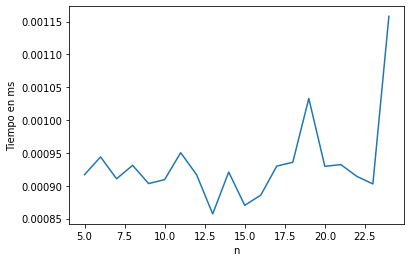

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x = []; y = [];

for n in range(5,25):
  t = 0

  for v  in range(3,25):
    graph,a = instance_generator(v)
    t += repeat(setup="from __main__ import BellmanFord", stmt=lambda: BellmanFord(graph, v, len(graph), a), repeat=1, number=10)[0]
    
  prom = t / 25
  x.append(n)
  y.append(prom)

plt.plot(x,y)

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Análisis de Resultados**

Según lo observado gráfica este tuvo un comportamiento algo inusual, se esperaba que al aumentar el tamaño del grafo aumentará el tiempo de ejecución debido que su caso promedio es de $O(E*V)$, aunque cabe de destacar un aumento exponecial en las ultimas iteraciones lo que supone que sea mas acorde a su peor caso $O(V^3)$
